__Machine Learningn Lyfecycle Example__

**1.Define Objective**

    Objective: Infer how IQ, Year Experience, and Age effects income using a linear model. 

__2. Collect Data__


In [4]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
from pandas import DataFrame as DF

**Create Dataset**

In [15]:
np.random.seed(555)
X1 = np.random.normal(loc=100,scale=15,size=200).astype(int)
X2 = np.random.normal(10,4.5,200)
X3 = np.random.normal(32,4,200).astype(int)
dateOfBirth = np.datetime64('2017-10-31') - 365 * X3
intercept = 5
noiseOrError = np.random.normal(0,1.5,200)

Y = np.array([0.3*x1 + 1.5*x2 + 0.83*x3 + intercept + e for x1,x2,x3,e in zip(X1,X2,X3,noiseOrError)])

**3. Cleaning the Data**

In [20]:
columns = ['iq','years_Experience','dateOfBirth']
dataFrame = DF(list(zip(X1,X2,dateOfBirth)), columns = columns)
dataFrame['income'] = Y
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
iq                  200 non-null int64
years_Experience    200 non-null float64
dateOfBirth         200 non-null datetime64[ns]
income              200 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 6.3 KB


In [21]:
dataFrame.describe()

,iq,years_Experience,income
count,200.000000,200.000000,200.000000
mean,98.895000,9.708405,75.177962
std,14.991253,4.654536,8.889551
min,62.000000,-5.789565,49.467100
25%,88.500000,6.603565,69.391361
50%,99.000000,10.021919,75.180707
75%,108.250000,12.927809,80.739804
max,134.000000,21.889216,98.380710


In [22]:
dataFrame = dataFrame[dataFrame.years_Experience >= 0]
dataFrame.describe()

,iq,years_Experience,income
count,196.000000,196.000000,196.000000
mean,98.959184,9.963718,75.603845
std,14.769628,4.332578,8.424493
min,62.000000,0.084480,54.325402
25%,88.500000,6.940314,69.619532
50%,99.000000,10.192384,75.327426
75%,108.250000,12.967590,80.798796
max,134.000000,21.889216,98.380710


**4. EDA **

In [23]:
dataFrame.describe(include=['datetime64'])

,dateOfBirth
count,196
unique,22
top,1986-11-08 00:00:00
freq,20
first,1975-11-11 00:00:00
last,1996-11-05 00:00:00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000126B943BE0>,
      dtype=object)

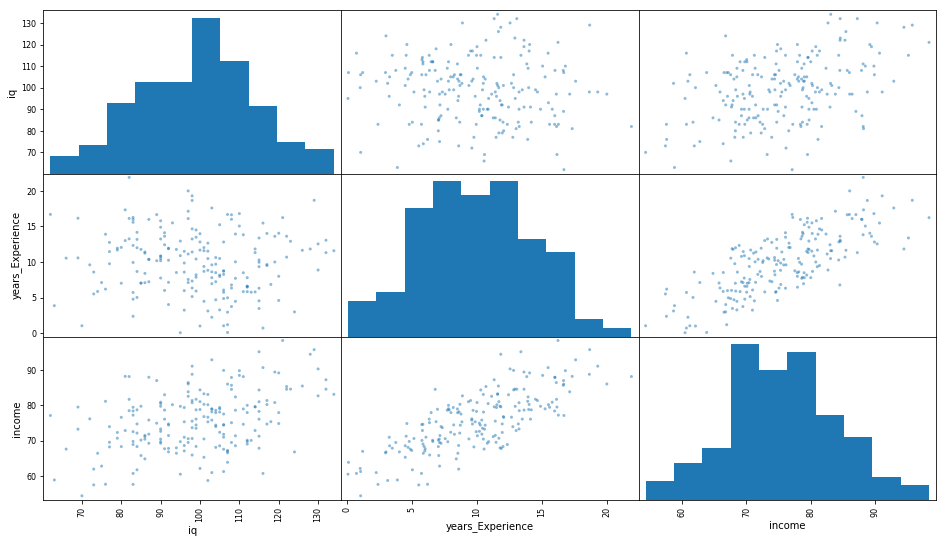

In [26]:
import matplotlib.pyplot as plot
%matplotlib inline 
pd.plotting.scatter_matrix(dataFrame,figsize=(16,9))

In [28]:
print(dataFrame.corr())

                        iq  years_Experience    income
iq                1.000000         -0.071096  0.419037
years_Experience -0.071096          1.000000  0.762783
income            0.419037          0.762783  1.000000


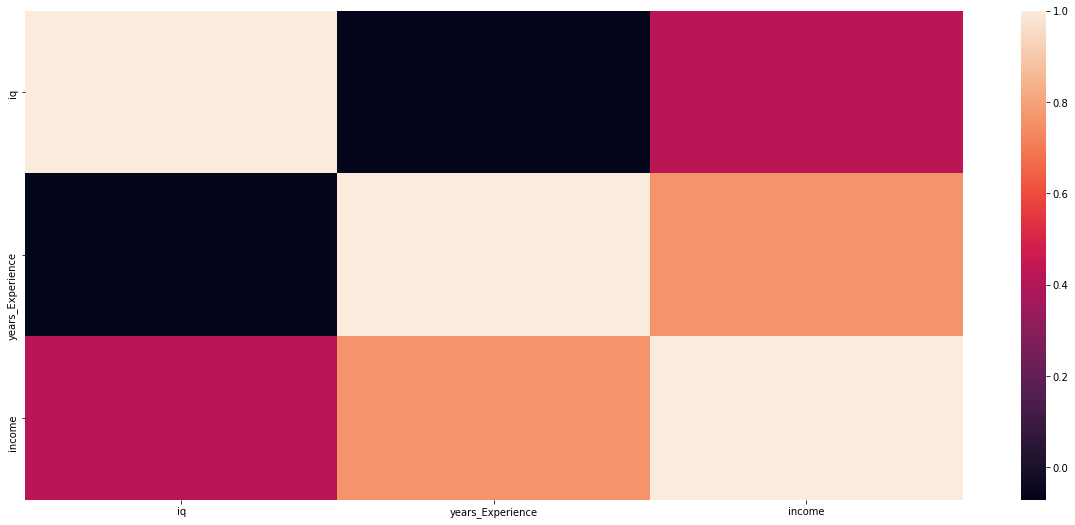

In [27]:
import seaborn as sb 
plot.figure(figsize=(21,9))
sb.heatmap(dataFrame.corr())

**5. Data Processing / Feature Engineering **

In [33]:
from datetime import datetime as dt 

dataFrame['age'] = dataFrame.dateOfBirth.apply(lambda x: (dt.strptime('2017-10-31','%Y-%m-%d')-x).days / 365)
dataFrame.drop('dateOfBirth',axis=1, inplace=True)
dataFrame.head()

,iq,years_Experience,income,age
0,102,3.134666,58.665854,23.0
1,105,15.245371,78.989823,25.0
2,83,2.391084,57.564307,29.0
3,103,9.606721,75.783867,33.0
4,97,11.134619,82.547093,36.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001270EE7358>,
      dtype=object)

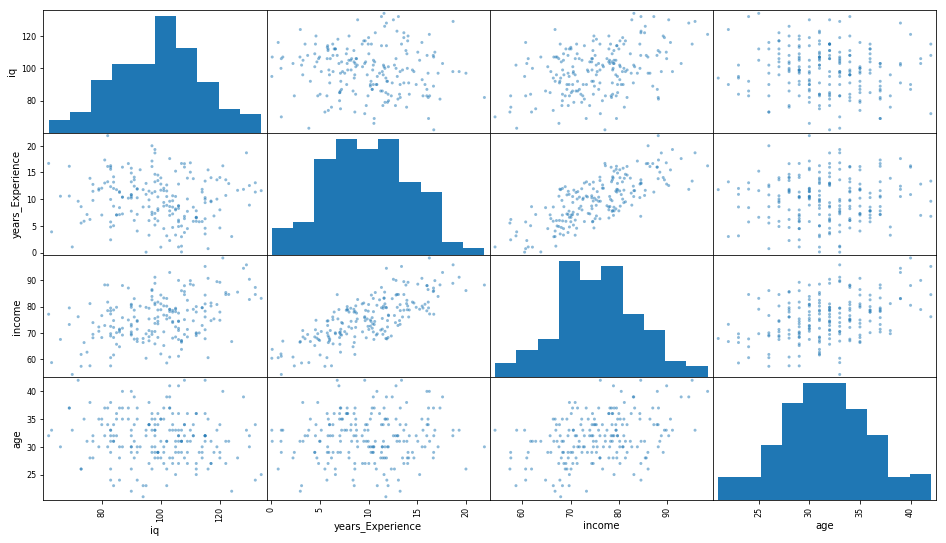

In [34]:
import matplotlib.pyplot as plot
%matplotlib inline 
pd.plotting.scatter_matrix(dataFrame,figsize=(16,9))

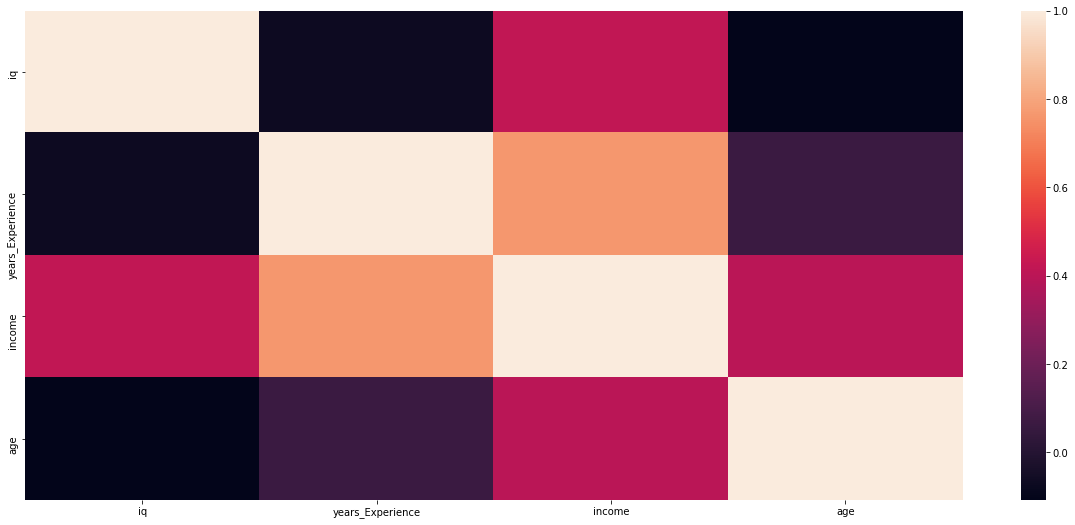

In [35]:
import seaborn as sb 
plot.figure(figsize=(21,9))
sb.heatmap(dataFrame.corr())

**6. Train/Evaluate Models**    

In [58]:
import tensorflow as tf
#Train/Test Split
X = dataFrame.iloc[:,[0,1,3]]
Y = dataFrame.income

tranning_index = X.sample(frac=0.67).index
x_training = X[X.index.isin(tranning_index)].values
x_test     = X[~X.index.isin(tranning_index)].values

y_training = Y[Y.index.isin(tranning_index)].values
y_test     = Y[~Y.index.isin(tranning_index)].values

**Create Model**

In [59]:
tf.reset_default_graph()

In [60]:
session = tf.Session()

#create parameters 
w = tf.get_variable(name='w', initializer=[[0.1],[0.1],[0.1]])
b = tf.get_variable(name='b', initializer=0.)

#create input placeholders 
x = tf.placeholder('float32',name='x')
y = tf.placeholder('float32',name='y_true')

#create linear model 
yhat = tf.reshape(tf.matmul(x,w) + b, [-1,], name='yhat')


**create the loss and test score function**

In [61]:
mse = tf.reduce_mean(tf.square(y-yhat),name='mse')
rmse = tf.sqrt(mse,name='rmse')

#test score NRMSE normalized root mean square error
test_nrmse = tf.divide(rmse, tf.abs(tf.reduce_mean(y)),name='nrmse')

In [62]:
#init variables 
init = tf.variables_initializer([w,b])
session.run(init)

**Tranning/Evaluate**

In [63]:
#reset parameters w and b 
session.run(init)

#run optimization again with smaller learning rate 
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = opt.minimize(rmse)

for i in range(800): 
    if(i%50 == 0) & (i > 0):
        nrmse = session.run(test_nrmse,{x: x_test, y: y_test})
        print('test NRMSE: {}'.format(nrmse))
    else:
        session.run(train, {x: x_training, y: y_training})

test NRMSE: 0.09230922907590866
test NRMSE: 0.07206017524003983
test NRMSE: 0.05386364459991455
test NRMSE: 0.07671386748552322
test NRMSE: 0.06902341544628143
test NRMSE: 0.07520979642868042
test NRMSE: 0.07132550328969955
test NRMSE: 0.07382585108280182
test NRMSE: 0.0724560096859932
test NRMSE: 0.07284624874591827
test NRMSE: 0.07300477474927902
test NRMSE: 0.07217751443386078
test NRMSE: 0.07327920943498611
test NRMSE: 0.07171953469514847
test NRMSE: 0.07342281937599182


In [ ]:
#0.3*x1 + 1.5*x2 + 0.83*x3 + 5

In [64]:
session.run([w,b])

[array([[0.2656638],
        [1.4262042],
        [0.9422257]], dtype=float32), 0.026071481]

**Result: **

    iq: for ever .001 increase in iq we have increase around ~260 dollar (260 = 0.265 * 1000) anually
    for every additional year of expeience the person will earn 1400 dollar (1400 = 1.425 * 1000 )
    the last value 0.942 is for age
    

# ** How our model evolve over time and how are the mse values changes **

**Create Mode**
- create summeries 
- merge summeries 
- create a summery writer 
- run merge summeries wit model in session 
- use the weiter to write the output 


In [94]:
tf.reset_default_graph()

In [95]:
session = tf.Session()

#create parameters 
w = tf.get_variable(name='w', initializer=[[0.1],[0.1],[0.1]])
tf.summary.scalar('wMean',tf.reduce_mean(w))
tf.summary.scalar('wSum',tf.reduce_sum(w))
tf.summary.histogram('weights',w)

b = tf.get_variable(name='b', initializer=0.)
tf.summary.scalar('intercept',b)

#create input placeholders 
x = tf.placeholder('float32',name='x')
y = tf.placeholder('float32',name='y_true')

#create linear model 
yhat = tf.reshape(tf.matmul(x,w) + b, [-1,], name='yhat')

**create the loss and test score function**

In [96]:
mse = tf.reduce_mean(tf.square(y-yhat),name='mse')
rmse = tf.sqrt(mse,name='rmse')

#test score NRMSE normalized root mean square error
test_nrmse = tf.divide(rmse, tf.abs(tf.reduce_mean(y)),name='nrmse')

#merge all the summeries and create the writer that will output them during the training 
summaries = tf.summary.merge_all()
writer = tf.summary.FileWriter(logdir='temp/linear_logs', graph=session.graph)

In [97]:
#init variables 
init = tf.variables_initializer([w,b])
session.run(init)

**Tranning/Evaluate**

In [98]:
#reset parameters w and b 
session.run(init)

#run optimization again with smaller learning rate 
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = opt.minimize(rmse)

for i in range(800): 
    if(i%50 == 0) & (i > 0):
        smry, nrmse = session.run([summaries, test_nrmse],{x: x_test, y: y_test})
        writer.add_summary(smry,i)
        #print('test NRMSE: {}'.format(nrmse))
    else:
        smry, _ = session.run([summaries,train], {x: x_training, y: y_training})
        writer.add_summary(smry,i)
        

In [99]:
session.run([w,b])

[array([[0.2656638],
        [1.4262042],
        [0.9422257]], dtype=float32), 0.026071481]

**in the termenal write**

tensorboard --logdir=temp/linear_logs